# Question 2 (35%)
An object at true position [xT , yT ]
T
in 2-dimensional space is to be localized using distance
(range) measurements to K reference (landmark) coordinates {[x1, y1]
T
,...,[xi
, yi
]
T
,...,[xK, yK]
T}.
These range measurements are ri = dTi +ni for i ∈ {1,...,K}, where dTi = k[xT , yT ]
T −[xi
, yi
]
Tk
is the true distance between the object and the i
th reference point, and ni
is a zero mean Gaussian distributed measurement noise with known variance σ
2
i
. The noise in each measurement is
independent from the others.
Assume that we have the following prior knowledge regarding the position of the object:
p
 
x
y
!
= (2πσxσy)
−1
e
−
1
2
h
x yi
"
σ
2
x 0
0 σ
2
y
#−1"
x
y
(1)
where [x, y]
T
indicates a candidate position under consideration.
Express the optimization problem that needs to be solved to determine the MAP estimate of
the object position. Simplify the objective function so that the exponentials and additive/multiplicative
terms that do not impact the determination of the MAP estimate [xMAP, yMAP]
T
are removed appropriately from the objective function for computational savings when evaluating the objective.
Implement the following as computer code: Set the true object location to be inside the
circle with unit radious centered at the origin. For each K ∈ {1,2,3,4} repeat the following.
Place evenly spaced K landmarks on a circle with unit radius centered at the origin. Set measurement noise standard deviation to 0.3 for all range measurements. Generate K range measurements according to the model specified above (if a range measurement turns out to be negative,
reject it and resample; all range measurements need to be nonnegative).
Plot the equilevel contours of the MAP estimation objective for the range of horizontal and
vertical coordinates from −2 to 2; superimpose the true location of the object on these equilevel
contours (e.g. use a + mark), as well as the landmark locations (e.g. use a o mark for each one).
Provide plots of the MAP objective function contours for each value of K. When preparing
your final contour plots for different K values, make sure to plot contours at the same function
value across each of the different contour plots for easy visual comparison of the MAP objective
landscapes.
Supplement your plots with a brief description of how your code works. Comment on the
behavior of the MAP estimate of position (visually assessed from the contour plots; roughly center
of the innermost contour) relative to the true position. Does the MAP estimate get closer to the
true position as K increases? Doe is get more certain? Explain how your contours justify your
conclusions.
Suggestion: For σx and σy consider values around 0.25, and for the noise variance values σ
2
i
consider values around 0.1 for posterior functions that are illustrative; you may choose different
values than what is suggested here, so make sure to specify what your values are in the numerical
results presented.
Note: The additive Gaussian distributed noise used in this question is actually not appropriate,
since it could lead to negative measurements, which are not legitimate for a proper distance sensor.
However, in this question, we will ignore this issue and proceeding with this noise model for
the sake of illustration. In practice, a multiplicative log-normal distributed noise may be more
appropriate than an additive normal distributed noise.


In [1]:
# Importing the necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt

Below is the MAP Estimator Function
It calculates the Likelihood and the Prior of a given candidate point and returns the MAP Estimate for that point

In [2]:
# Initializing the Map Estimator function
def map_estimator(stddev1, stddev2, x, y, R, Dti, sigma_i):
#     map_estimate = []
    likelihood_term = []
    for i, (r, dti) in enumerate(zip(R, Dti)):
        likelihood_term.append(((r - dti)**2)/sigma_i**2)
    prior_x_y_term = (((x**2) / (stddev1**2)) + ((y**2) / (stddev2**2)))
    map_estimate = sum(likelihood_term) + prior_x_y_term
    return map_estimate

Below I set the Object's true location inside the Unit circle centered at Origin

In [3]:
# Setting the Object's True location inside the unit circle
O_loc = [0.8, 0.8]

Here I am setting the Sigma values for the Gaussian Noise and the Prior

In [4]:
# Setting noise variance
sigma_i = 0.04

# Setting Sigma Values
sigma_x = 0.05
sigma_y = 0.05

# Setting levels for contours
levels = 40

Below I am calculating the Distance of the Landmark point from the True Location of the object and corrupting it with a Gaussian Noise

In [5]:
# Calculating ri for landmark points
def cal_ri(KX, KY):
    R = []
    Dti = []
    for (kx, ky) in zip(KX, KY):
        ni = np.random.normal(loc=0, scale=sigma_i)
        dti = math.sqrt(((O_loc[0] - kx)**2) + ((O_loc[1] - ky)**2))
        R.append(dti + ni)
        Dti.append(dti)
    return R, Dti

Below I am finding the distance of the Landmark point from the candidate location

In [6]:
# Calculating Dti for candidate point
def cal_dti(KX, KY, xref, yref):
    Dti = []
    for (kx, ky) in zip(KX, KY):
        Dti.append(math.sqrt(((xref - kx)**2) + ((yref - ky)**2)))
    return Dti

In [7]:
X = np.arange(-2, 2.2, 0.2)
Y = np.arange(-2, 2.2, 0.2)

In [8]:
X1, Y1 = np.meshgrid(X,Y)

The function below takes every value inside the meshgrid ranging from -2 to +2 and runs it through the MAP estimator and then stores it in the variable Z1.
I then plot the contour of X1, Y1 and Z1 points.

In [9]:
def generate_contour_plot_for_K(sigma_x, sigma_y, K, X1, Y1, sigma_i):
    Z1 = np.zeros(list(X1.shape))
    predicted_point = []
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            Z1[i][j] = map_estimator(sigma_x, sigma_y, X1[i][j], Y1[i][j], cal_ri(K[:, 0], K[:, 1])[0], cal_dti(K[:, 0], K[:, 1], X1[i][j], Y1[i][j]), sigma_i)
    contour = plt.contourf(X1, Y1, Z1, levels=levels)
    for (x, y) in K:
        plt.scatter(x, y, color='r', marker='o',label='Landmark Point')
    plt.scatter(O_loc[0], O_loc[1], color='g', marker='+', label='Object Location', s=70)
    plt.scatter(X1.reshape(X1.size, 1)[np.argmin(Z1)], Y1.reshape(Y1.size, 1)[np.argmin(Z1)], marker='*', label='Prediction Label', s=30)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('MAP Estimate Contour plot for {} reference Landmark Points'.format(K.shape[0]))
    plt.legend(loc='lower left')

#### Case 1: K = {1}

In [10]:
K = np.array([[1, 0]])

<IPython.core.display.Javascript object>


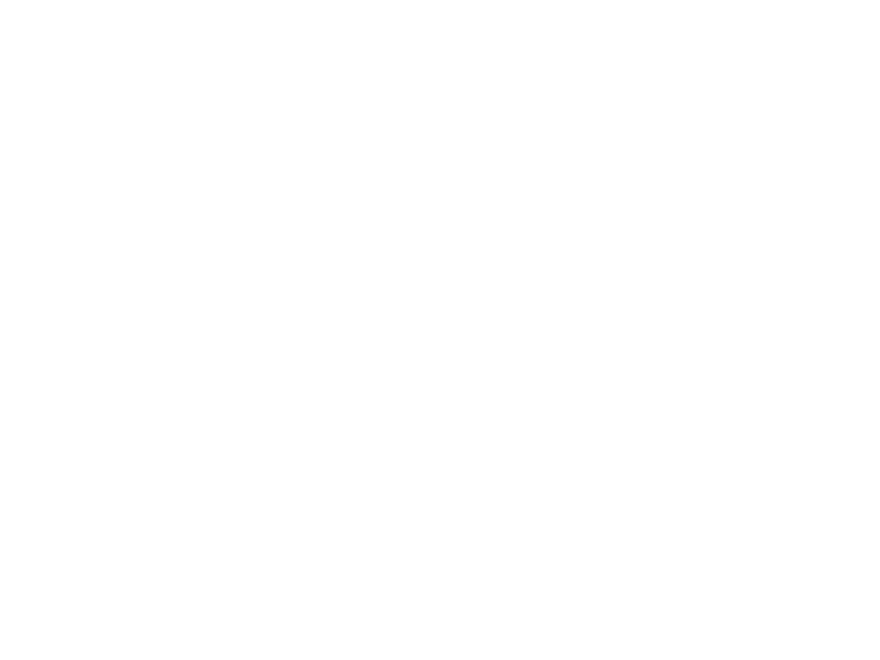

In [11]:
%matplotlib notebook
generate_contour_plot_for_K(sigma_x, sigma_y, K, X1, Y1, sigma_i)

#### Case 2: K = {2}

In [12]:
K = np.array([[1, 0], [-1, 0]])

<IPython.core.display.Javascript object>


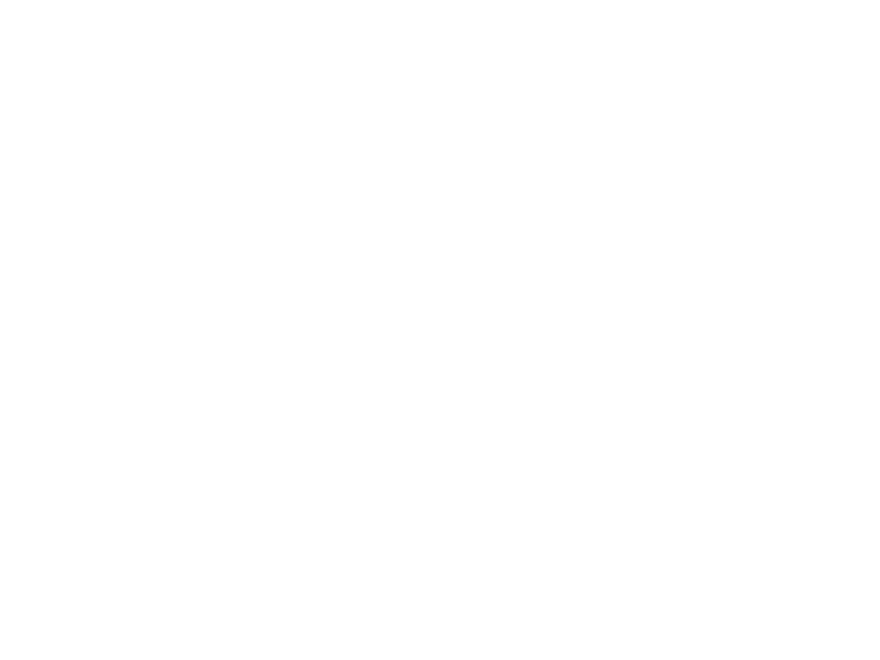

In [13]:
%matplotlib notebook
generate_contour_plot_for_K(sigma_x, sigma_y, K, X1, Y1, sigma_i)

#### Case 2: K = {3}

In [14]:
K = np.array([[-0.866, -0.5], [0, 1], [0.866, -0.5]])

<IPython.core.display.Javascript object>


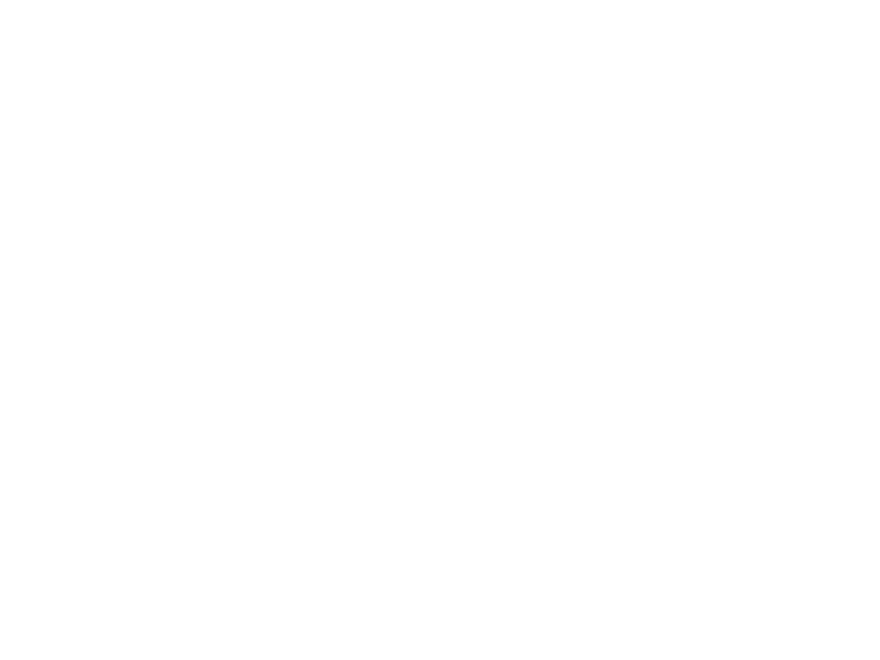

In [15]:
%matplotlib notebook
generate_contour_plot_for_K(sigma_x, sigma_y, K, X1, Y1, sigma_i)

#### Case 2: K = {4}

In [16]:
K = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

<IPython.core.display.Javascript object>


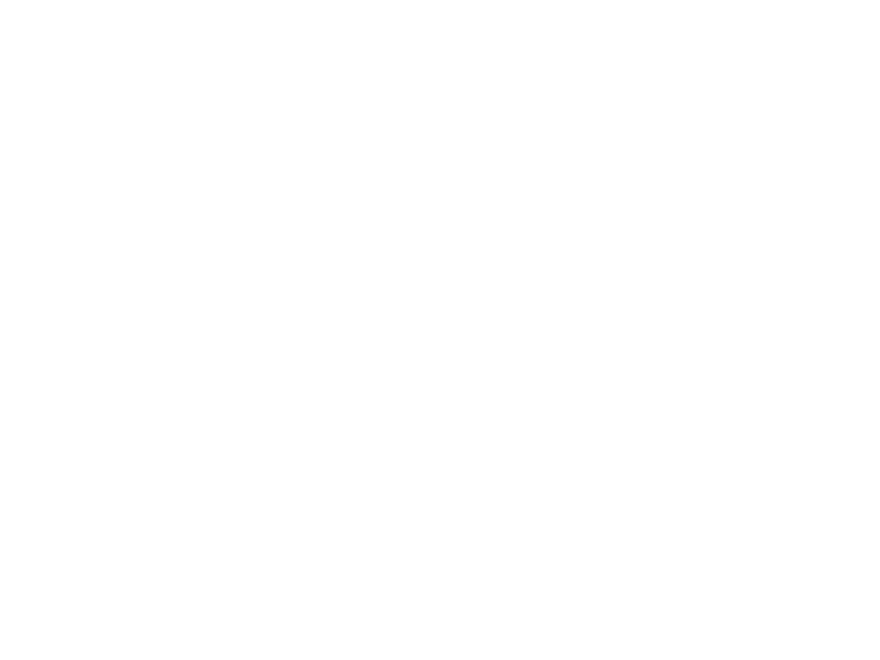

In [17]:
%matplotlib notebook
generate_contour_plot_for_K(sigma_x, sigma_y, K, X1, Y1, sigma_i)

## Conclusion

We derived the MAP estimation function for localizing the object position.
The likelihood we achieved along with the prior term have been coded above in the MAP estimation function.
Considering 1 referene landmark point, the distance measure from the object position along with the noise is the value of ri.
Now we don't know where the object lies and we have to find it based on the distance we have measured. So that results in increasing the likelihood of our object to lie inside a circle centered around the Landmark point, with a radius of the distance measured.
The prior that we have is Zero mean with Sigma X and Sigma Y being the values that control the variance of that point.
That means it is centered at origin and its job is to pull the localization towards the center.
Hence the convergence of the Prior and the Likelihood will tilt the contour shape in a direction of where the object position is likely to be, but not exactly depending upon the intensity of the noise.

As we reduce the noise, the maximum MAP estimate likelihood as per the contour converges towards the True Object position.


Along with this, as is evident from the plots above, as the number of Landmark points increase, the MAP estimate prediction i.e the center of the contour region starts getting closer to the True Object position.

Infact, if we reduce the noise further, for the case of 4 landmark points, we can actually see that the predicted point converges with the actual location of the object.

<IPython.core.display.Javascript object>


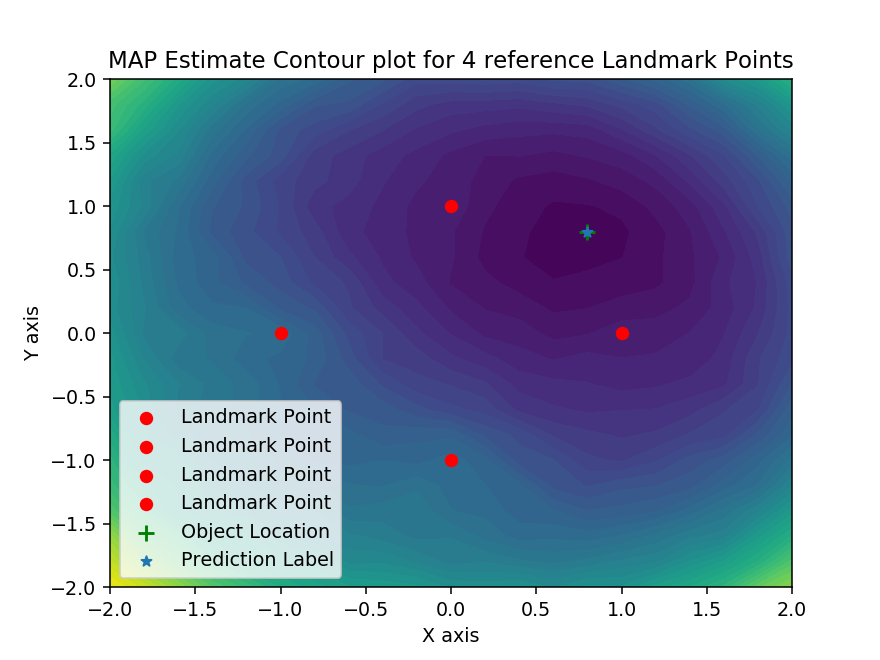

In [18]:
%matplotlib notebook
K = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
generate_contour_plot_for_K(sigma_x, sigma_y, K, X1, Y1, 0.02)

So I would say that the localization gets more certain with the increasing number of Landmark Points

Along with that, we can observe that the innermost contour shape and area reduces as the number of landmark points increase. This goes to say that as we get a better idea of the likelihood of where the object lies, we start getting more certain and the MAP estimation reflects that with the shape of the contour.